In [165]:
import numpy as np
from scipy.optimize import minimize
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [166]:
np.random.seed(13)

X_binomial = np.random.normal(size=100)
intercept = np.ones(X_binomial.shape)

X_binomial_w_intercept = np.column_stack((intercept, X_binomial))

true_beta = np.array([-1,2])

logits = np.dot(X_binomial_w_intercept, true_beta)
prob = 1/ (1 + np.exp(-logits))

Y_binomial = np.random.binomial(1,prob)

# Y ~ Binomial(p)
# g(p) = b0 * 1 + b1 * X

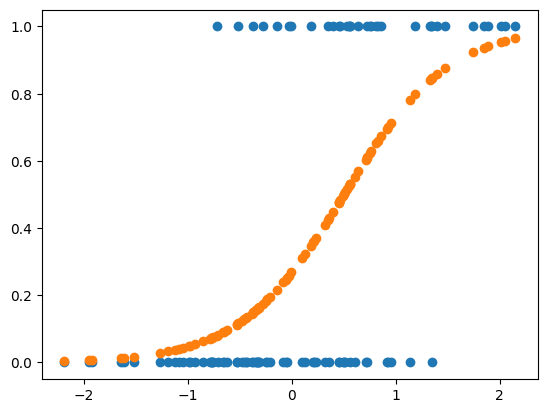

In [167]:
fig, ax = plt.subplots()
ax.plot(X_binomial, Y_binomial, "o")
ax.plot(X_binomial, prob, "o")

In [168]:
def neg_log_likelihood_binomial(beta, X, Y):
    logits = np.dot(X, beta) 
    nll = -np.sum(Y * logits - np.log(1+ np.exp(logits)))
    return nll

In [169]:
initial_beta = np.zeros(X_binomial_w_intercept.shape[1])
res_binomial = minimize(neg_log_likelihood_binomial, initial_beta, args=(X_binomial_w_intercept, Y_binomial))


In [170]:
x_range_binomial = np.linspace(X_binomial.min(), X_binomial.max(), 300)
log_fit = 1 / (1 + np.exp(-(res_binomial.x[0] + res_binomial.x[1] * x_range_binomial)))

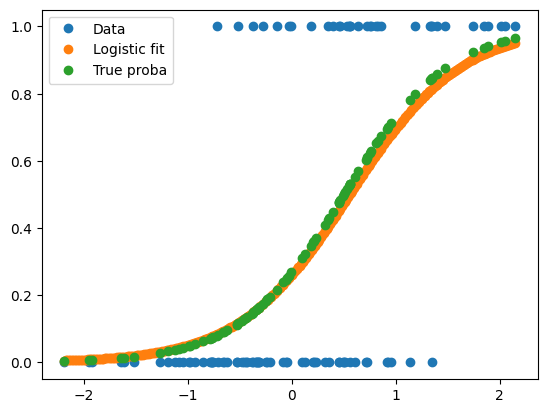

In [171]:
fig, ax = plt.subplots()
ax.plot(X_binomial, Y_binomial, "o", label = "Data")
ax.plot(x_range_binomial, log_fit, "o", label = "Logistic fit")
ax.plot(X_binomial, prob, "o", label = "True proba")
plt.legend()

OTRO EJEMPLO

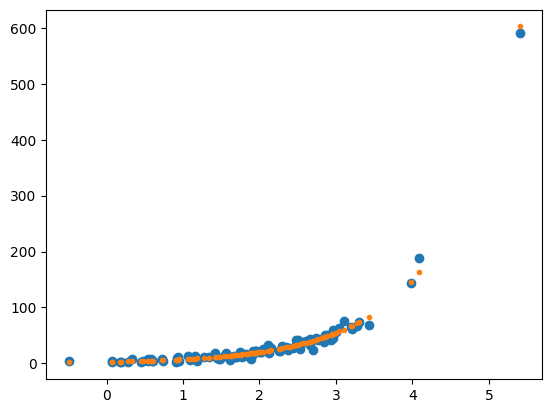

In [172]:
X_poisson = np.random.normal(2,1,100)
intercept = np.ones(X_poisson.shape)
X_poisson_w_intercept = np.column_stack((intercept, X_poisson))
true_beta = np.array([1,1])
lambda_ = np.exp(np.dot(X_poisson_w_intercept, true_beta))
Y_poisson = np.random.poisson(lambda_)

fig, ax = plt.subplots()
ax.plot(X_poisson, Y_poisson, "o")
ax.plot(X_poisson, lambda_, ".")

In [173]:
def neg_log_likelihood_poisson(beta, X, Y):
    lambda_ = np.exp(np.dot(X, beta))
    return -np.sum(Y*np.log(lambda_) - lambda_)

In [174]:
initial_beta = np.zeros(X_poisson_w_intercept.shape[1])
res_poisson = minimize(neg_log_likelihood_poisson, initial_beta, args = (X_poisson_w_intercept, Y_poisson))

x_range_poisson = np.linspace(X_poisson.min(),X_poisson.max(), 300 )
poisson_fit = np.exp(res_poisson.x[0] + res_poisson.x[1] * x_range_poisson)

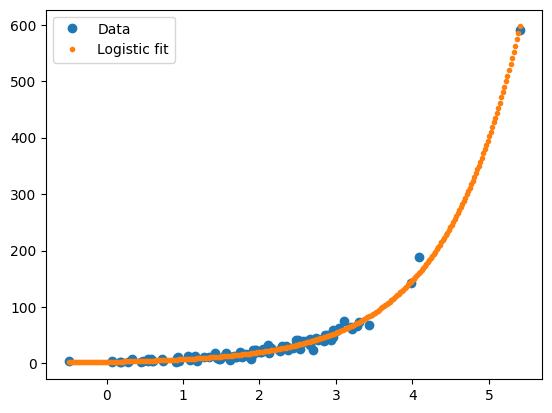

In [175]:
fig, ax = plt.subplots()
ax.plot(X_poisson, Y_poisson, "o", label = "Data")
ax.plot(x_range_poisson, poisson_fit, ".", label = "Logistic fit")
plt.legend()

In [176]:
mu = np.exp(np.dot(X_poisson_w_intercept, res_poisson.x))
W = np.diag(mu)
Fisher_info_mz = X_poisson_w_intercept.T @ W @ X_poisson_w_intercept
cov_matrix = inv(Fisher_info_mz)

poisson_fit = np.exp(res_poisson.x[0] + res_poisson.x[1] * x_range_poisson)

top_poisson_fit = np.exp(res_poisson.x[0] + (res_poisson.x[1] + np.sqrt(cov_matrix[1][1]) * 2) * x_range_poisson)

bottom_poisson_fit = np.exp(res_poisson.x[0] + (res_poisson.x[1] - np.sqrt(cov_matrix[1][1]) * 2) * x_range_poisson)

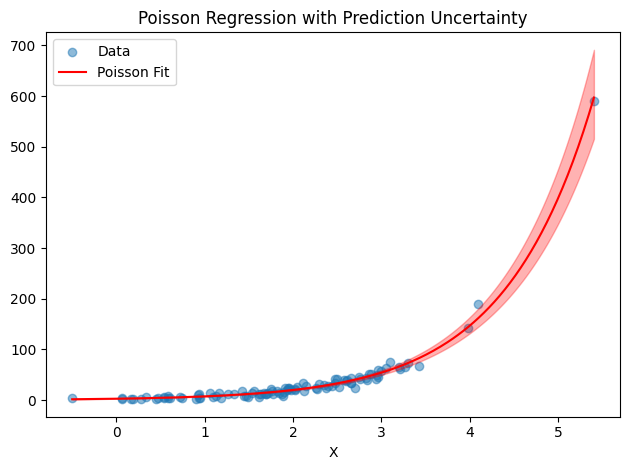

In [177]:
fig, ax = plt.subplots()
ax.scatter(X_poisson, Y_poisson, alpha=0.5, label="Data")
ax.plot(x_range_poisson, poisson_fit, color='red', label="Poisson Fit")
ax.fill_between(x_range_poisson, bottom_poisson_fit, top_poisson_fit, color='red', alpha=0.3)
ax.set_title("Poisson Regression with Prediction Uncertainty")
ax.set_xlabel("X")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

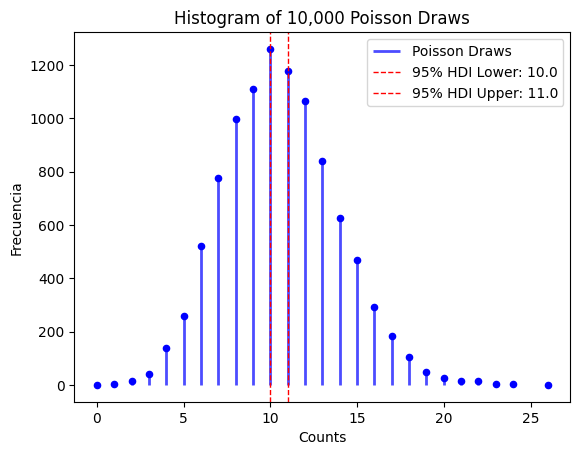

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

mu = 10.5
samples = poisson.rvs(mu, size=10000)

def poisson_hdi(mu, alpha=0.95):
    lower_bound = poisson.ppf(alpha/2, mu)
    upper_bound = poisson.ppf(1 - alpha/2, mu)
    return lower_bound, upper_bound

hdi_lower, hdi_upper = poisson_hdi(mu)

values, counts = np.unique(samples, return_counts=True)

fig, ax = plt.subplots()
ax.vlines(values, 0, counts, colors="blue", linestyles="-", lw=2, label='Poisson Draws', alpha=0.7)
ax.scatter(values, counts, color="blue", s=20)  # Emphasize each point
ax.axvline(hdi_lower, color='red', linestyle="--", linewidth=1, label=f"95% HDI Lower: {hdi_lower}")
ax.axvline(hdi_upper, color='red', linestyle="--", linewidth=1, label=f"95% HDI Upper: {hdi_upper}")
ax.set_title("Histogram of 10,000 Poisson Draws")
ax.set_xlabel("Counts")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.show()


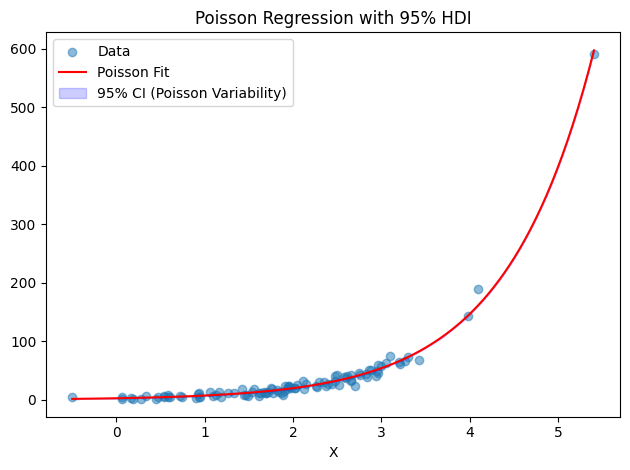

In [179]:
x_range_poisson = np.linspace(X_poisson.min(), X_poisson.max(), 100)
predicted_mu = np.exp(res_poisson.x[0] + res_poisson.x[1] * x_range_poisson)

hdi_lower, hdi_upper = [], []
for mu in predicted_mu:
    lower, upper = poisson_hdi(mu)
    hdi_lower.append(lower)
    hdi_upper.append(upper)

fig, ax = plt.subplots()
ax.scatter(X_poisson, Y_poisson, alpha=0.5, label='Data')
ax.plot(x_range_poisson, predicted_mu, color='red', label='Poisson Fit')
ax.fill_between(x_range_poisson, hdi_lower, hdi_upper, color='blue', alpha=0.2, label='95% CI (Poisson Variability)')
ax.set_title('Poisson Regression with 95% HDI')
ax.set_xlabel('X')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()
